In [1]:
import pandas as pd
import math

### Define DataFrame combination function

In [2]:
# calculate seconds for sent
def get_processed_df(received_data_path: str, sent_data_path: str) -> pd.DataFrame:
    """
    Get processed dataframe for a run.  
    It will merge sent and received json files and calculate seconds for sent packets.
    """
    sent_df = pd.read_json(sent_data_path)
    received_df = pd.read_json(received_data_path)
    
    sent_df = pd.json_normalize(sent_df['sent_packet_list'])
    received_df = pd.json_normalize(received_df['received_packet_list'])

    # eliminate row with packet_id = -1
    sent_df = sent_df[sent_df['packet_id'] != -1]
    received_df = received_df[received_df['packet_id'] != -1]
    sent_df['second'] = (sent_df['sent_time'] - sent_df['sent_time'].iloc[0]) / 1000000
    sent_df['second'] = sent_df['second'].apply(lambda x: math.floor(x))
    sent_df['packet_id'] = sent_df['packet_id'].astype(int)
    received_df['packet_id'] = received_df['packet_id'].astype(int)
    sent_received = pd.merge(sent_df, received_df, how='left', left_on='packet_id', right_on='packet_id', validate='one_to_one')
    sent_received['delay_in_microseconds'] = sent_received['received_time'] - sent_received['sent_time']
    return sent_received

### Define Get Status Value function

In [3]:
def get_stats_values(df: pd.DataFrame) -> None:
    total_sent_packets = df.shape[0]
    total_received_packets = df[df['received_time'].notnull()].shape[0]
    print(f"Total sent packets: {total_sent_packets}")
    print(f"Total received packets: {total_received_packets}")
    print(f"Total lost packets: {total_sent_packets - total_received_packets}")
    print(f"Total lost packets percentage: {(total_sent_packets - total_received_packets) / total_sent_packets * 100}%")
    print(f"Average delay: {df['delay_in_microseconds'].mean()} microseconds")

### Lab1

In [35]:
kb_list = [10, 100, 500]
drop_rate_list = [0, 5, 10, 15, 25]

for kb in kb_list:
    for drop_rate in drop_rate_list:
        if kb == 500 and drop_rate == 25:
            continue
        print(f"For {kb}KB and {drop_rate}% drop rate:")
        df = get_processed_df(f"received-data/lab1/{kb}_drop_{drop_rate}.json", f"sent-data/lab1/{kb}_drop_{drop_rate}.json")
        get_stats_values(df)
        print("--------------------")

For 10KB and 0% drop rate:
Total sent packets: 15000
Total received packets: 15000
Total lost packets: 0
Total lost packets percentage: 0.0%
Average delay: 3007.8596 microseconds
--------------------
For 10KB and 5% drop rate:
Total sent packets: 15000
Total received packets: 14972
Total lost packets: 28
Total lost packets percentage: 0.18666666666666668%
Average delay: 24802.85325941758 microseconds
--------------------
For 10KB and 10% drop rate:
Total sent packets: 15000
Total received packets: 10089
Total lost packets: 4911
Total lost packets percentage: 32.74%
Average delay: 740673.4192685103 microseconds
--------------------
For 10KB and 15% drop rate:
Total sent packets: 15000
Total received packets: 3155
Total lost packets: 11845
Total lost packets percentage: 78.96666666666667%
Average delay: 1916204.2469096673 microseconds
--------------------
For 10KB and 25% drop rate:
Total sent packets: 15000
Total received packets: 750
Total lost packets: 14250
Total lost packets percent

#### plot relationship between drop rate and delay

In [8]:
import matplotlib.pyplot as plt

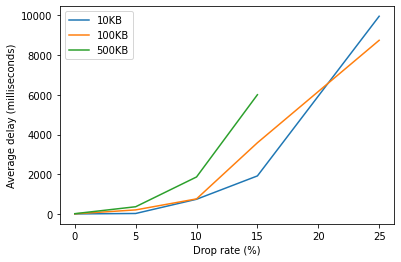

In [43]:

kb_list = [10, 100, 500]
drop_rate_list = [0, 5, 10, 15, 25]

# every key is a drop rate, and the value is also a dict with key is kb and value is average delay in microseconds
drop_rate_kb_dict = {}
for drop_rate in drop_rate_list:
    drop_rate_kb_dict[drop_rate] = {}
    for kb in kb_list:
        if kb == 500 and drop_rate == 25:
            continue
        df = get_processed_df(f"received-data/lab1/{kb}_drop_{drop_rate}.json", f"sent-data/lab1/{kb}_drop_{drop_rate}.json")
        drop_rate_kb_dict[drop_rate][kb] = df['delay_in_microseconds'].mean() / 1000

# plot
for kb in kb_list:
    x = []
    y = []
    for drop_rate in drop_rate_list:
        if kb == 500 and drop_rate == 25:
            continue
        x.append(drop_rate)
        y.append(drop_rate_kb_dict[drop_rate][kb])
    plt.plot(x, y, label=f"{kb}KB")
    plt.xlabel("Drop rate (%)")
    plt.ylabel("Average delay (milliseconds)")
    # legend
    plt.legend()

### Lab 2

In [7]:
kb_list = [1, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for kb in kb_list:
    print(f"For {kb}KB and 10% drop rate:")
    df = get_processed_df(f"received-data/lab2/{kb}_drop_10.json", f"sent-data/lab2/{kb}_drop_10.json")
    get_stats_values(df)
    print("--------------------")

For 1KB and 10% drop rate:
Total sent packets: 15000
Total received packets: 15000
Total lost packets: 0
Total lost packets percentage: 0.0%
Average delay: 50750.346666666665 microseconds
--------------------
For 4KB and 10% drop rate:
Total sent packets: 15000
Total received packets: 14621
Total lost packets: 379
Total lost packets percentage: 2.526666666666667%
Average delay: 175299.61808357842 microseconds
--------------------
For 8KB and 10% drop rate:
Total sent packets: 2000
Total received packets: 1635
Total lost packets: 365
Total lost packets percentage: 18.25%
Average delay: 271910.895412844 microseconds
--------------------
For 16KB and 10% drop rate:
Total sent packets: 15000
Total received packets: 7248
Total lost packets: 7752
Total lost packets percentage: 51.68000000000001%
Average delay: 472607.69991721853 microseconds
--------------------
For 32KB and 10% drop rate:
Total sent packets: 1000
Total received packets: 205
Total lost packets: 795
Total lost packets percent

([<matplotlib.axis.XTick at 0x1cabbb26850>,
 [Text(0, 0, '1'),
  Text(1, 0, '4'),
  Text(2, 0, '8'),
  Text(3, 0, '16'),
  Text(4, 0, '32'),
  Text(5, 0, '64'),
  Text(6, 0, '256'),
  Text(7, 0, '512'),
  Text(8, 0, '1024')])

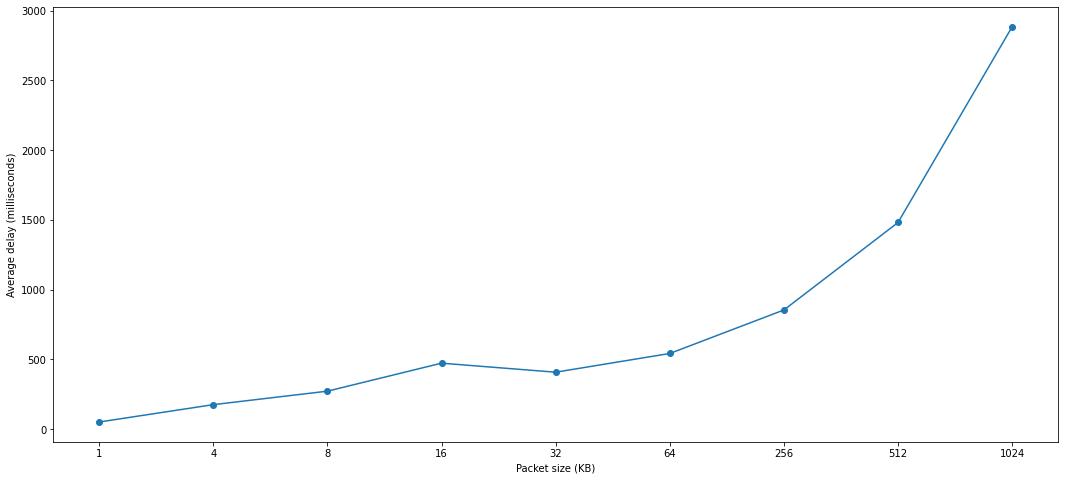

In [25]:
# make figure larger
plt.rcParams["figure.figsize"] = (18,8)

kb_list = [1, 4, 8, 16, 32, 64, 256, 512, 1024]
default_x_ticks = range(len(kb_list))
avg_delay_list = []
for kb in kb_list:
    df = get_processed_df(f"received-data/lab2/{kb}_drop_10.json", f"sent-data/lab2/{kb}_drop_10.json")
    avg_delay_list.append(df['delay_in_microseconds'].mean() / 1000)

plt.xlabel("Packet size (KB)")
plt.ylabel("Average delay (milliseconds)")
plt.plot(default_x_ticks, avg_delay_list, label="Average delay", marker='o')
plt.xticks(default_x_ticks, kb_list)

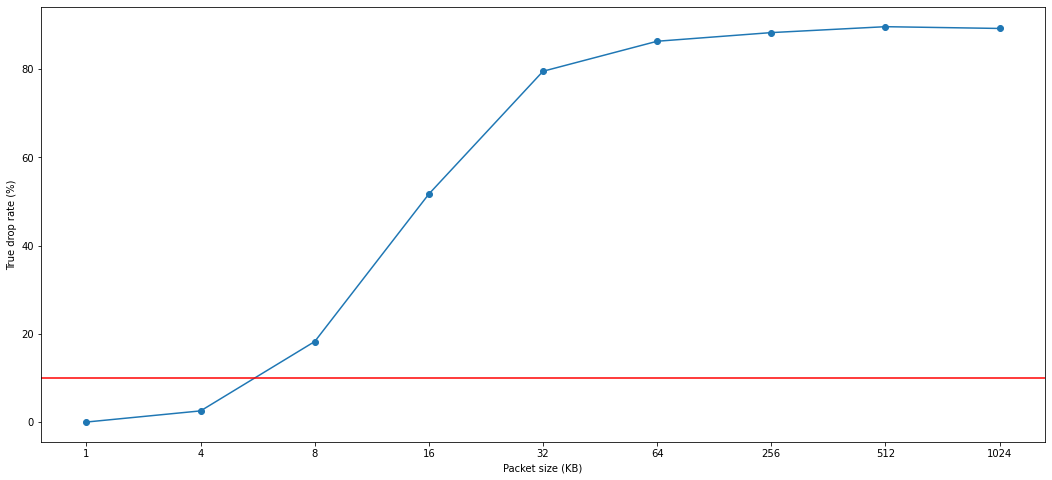

In [24]:
# make figure larger
plt.rcParams["figure.figsize"] = (18,8)

kb_list = [1, 4, 8, 16, 32, 64, 256, 512, 1024]
default_x_ticks = range(len(kb_list))
true_drop_percent_list = []
for kb in kb_list:
    df = get_processed_df(f"received-data/lab2/{kb}_drop_10.json", f"sent-data/lab2/{kb}_drop_10.json")
    total_sent_packets = df.shape[0]
    total_received_packets = df[df['received_time'].notnull()].shape[0]
    true_drop_percent_list.append((total_sent_packets - total_received_packets) / total_sent_packets * 100)

plt.xlabel("Packet size (KB)")
plt.ylabel("True drop rate (%)")
plt.plot(default_x_ticks, true_drop_percent_list, label="True drop rate", marker='o')
plt.xticks(default_x_ticks, kb_list)

# plot a line for 10% drop rate (horizontal line)
plt.axhline(y=10, color='r', linestyle='-')